<a href="https://colab.research.google.com/github/LeonardoGastaldo/labo2025v/blob/main/src/workflows/Test%20de%20Wilcoxon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comenzando... Limpiando la memoria

In [1]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,657218,35.1,1454500,77.7,1325417,70.8
Vcells,1220160,9.4,8388608,64.0,1975136,15.1


### Vectores con Ganancias promedio
Se genera un vector por cada una de las Ganancias obtenidas para los 10 experimentos realizados con diferentes semillas y cada uno de las familias de hiperparametros optimizados.

In [2]:
# Definición de los Vectores de Datos (Re-definición para asegurar la lista)
PARAM_2HT = c(6276600, 5625600, 6058500, 5749200, 5953500, 6097200, 5925900, 5591700, 6154200, 6625500)
PARAM_4HT = c(5903100, 6764400, 6022500, 5929200, 5769600, 5875500, 6233400, 5957100, 6008100, 6402600)
PARAM_6HT = c(5831700, 6885600, 5992800, 6136500, 6597600, 6172200, 6172200, 6291300, 6216000, 5741400)
PARAM_8HT = c(6620700, 6579900, 6681900, 5817300, 6032400, 5977500, 6266400, 6620400, 6710700, 6132600)
PARAM_10HT = c(5873400, 6117000, 5563200, 6168600, 6162900, 6747900, 5963100, 6198000, 6648000, 6473100)
PARAM_12HT = c(5894100, 6294600, 6810900, 5958300, 6386700, 6668400, 6620400, 6015900, 6340800, 5747700)
PARAM_16HT = c(5832600, 5676900, 6025200, 6276300, 6530400, 6075600, 5988600, 6354000, 5962800, 5992500)

# Lista principal con todos los parámetros
todos_los_parametros <- list(
  PARAM_2HT = PARAM_2HT,
  PARAM_4HT = PARAM_4HT,
  PARAM_6HT = PARAM_6HT,
  PARAM_8HT = PARAM_8HT,
  PARAM_10HT = PARAM_10HT,
  PARAM_12HT = PARAM_12HT,
  PARAM_16HT = PARAM_16HT
)

# Inicializar el data frame para almacenar los resultados
resultados_completos <- data.frame(
  Grupo1 = character(),
  Grupo2 = character(),
  N_Pares = numeric(),
  Estadistico_V = numeric(),
  P_Valor = numeric(),
  Significancia_5pc = character(),
  stringsAsFactors = FALSE
)

# Obtener los nombres de los vectores
nombres <- names(todos_los_parametros)
num_vectores <- length(nombres)
n_pares <- length(todos_los_parametros[[1]]) # Asumimos que todos tienen la misma longitud (10)

### Test de Wilcoxon
Se hace el Test de Wilcoxon para probar si hay una diferencia significativa entre las ganancias obtenidas con diferentes cantidad de Hiperarametros Optimizados con la BAYESIANA.

Se hace la comparación de a pares y se va guardando el resultados del análisis estadístico.

In [3]:
# 4. Bucle Doble (Anidado)
# El bucle externo (i) selecciona el primer vector
for (i in 1:(num_vectores - 1)) {
  # El bucle interno (j) selecciona el segundo vector, asegurándose de que j > i
  # Esto evita comparaciones duplicadas (10HT vs 8HT) y comparaciones consigo mismo (8HT vs 8HT)
  for (j in (i + 1):num_vectores) {

    nombre1 <- nombres[i]
    nombre2 <- nombres[j]

    vector1 <- todos_los_parametros[[i]]
    vector2 <- todos_los_parametros[[j]]

    # Ejecutar el Test de Wilcoxon de Rangos con Signo
    prueba <- wilcox.test(vector1, vector2, paired = TRUE, exact = FALSE)

    # Extraer los valores
    p_valor <- prueba$p.value
    estadistico_v <- prueba$statistic

    # Determinar la significancia
    significancia <- ifelse(p_valor < 0.05, "SI (Rechazar H0)", "NO (Mantener H0)")

    # Crear una nueva fila y añadirla
    nueva_fila <- data.frame(
      Grupo1 = sub("PARAM_", "", nombre1),
      Grupo2 = sub("PARAM_", "", nombre2),
      N_Pares = n_pares,
      Estadistico_V = estadistico_v,
      P_Valor = p_valor,
      Significancia_5pc = significancia
    )

    resultados_completos <- rbind(resultados_completos, nueva_fila)
  }
}

### Detalle del Test de Wilcoxon

Se demuestra para cada par de Hiperametro comprobados estadísticamente con el Test de Wilcoxon si es significado o no la diferencia encontrada. También se muestra si se Rechaza o no la Hipótesis cero.

In [4]:
# Cargar dplyr si no está cargado
library(dplyr)

# Definir el orden deseado
orden_grupos <- c("2HT", "4HT", "6HT", "8HT", "10HT", "12HT", "16HT")

# Convertir columnas a factores ordenados
resultados_completos$Grupo1 <- factor(resultados_completos$Grupo1, levels = orden_grupos)
resultados_completos$Grupo2 <- factor(resultados_completos$Grupo2, levels = orden_grupos)

# Ordenar por Grupo1 y luego Grupo2
resultados_ordenados <- arrange(resultados_completos, Grupo1, Grupo2)

# Mostrar
print(resultados_ordenados)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




    Grupo1 Grupo2 N_Pares Estadistico_V    P_Valor Significancia_5pc
V      2HT    4HT      10            27 1.00000000  NO (Mantener H0)
V1     2HT    6HT      10            17 0.30806323  NO (Mantener H0)
V2     2HT    8HT      10             9 0.06654572  NO (Mantener H0)
V3     2HT   10HT      10            14 0.18514372  NO (Mantener H0)
V4     2HT   12HT      10            13 0.15357640  NO (Mantener H0)
V5     2HT   16HT      10            23 0.68348090  NO (Mantener H0)
V6     4HT    6HT      10            15 0.22127182  NO (Mantener H0)
V7     4HT    8HT      10            13 0.15357640  NO (Mantener H0)
V8     4HT   10HT      10            22 0.61029866  NO (Mantener H0)
V9     4HT   12HT      10            15 0.22127182  NO (Mantener H0)
V10    4HT   16HT      10            28 1.00000000  NO (Mantener H0)
V11    6HT    8HT      10            17 0.30806323  NO (Mantener H0)
V12    6HT   10HT      10            29 0.91881268  NO (Mantener H0)
V13    6HT   12HT      10         

### **No hay diferencia estadística significativa**
Como NO hay datos en la tabla que se visualiza a continuación y resulta vacía, entonces NO hay diferencia estadísticamente significativa entre ninguno de los pares de Hiperparametros con un nivel de significancia del 5%.

In [5]:
# Mostrar los pares que SÍ son significativos
subset(resultados_completos, Significancia_5pc == "SI (Rechazar H0)")

Grupo1,Grupo2,N_Pares,Estadistico_V,P_Valor,Significancia_5pc
<fct>,<fct>,<int>,<dbl>,<dbl>,<chr>


Es decir:

*   Si los p-valores >= 0.05, entonces en ninguna comparación se rechaza H0.
*   Y por tanto, todas las combinaciones se consideran no significativamente distintas entre sí.

### Matriz de significancia por pares

Mostramos una matriz de p-valores de comparaciones por pares, proveniente de los tests de Wilcoxon emparejados entre todos los grupos de Hiperpametros.

In [6]:
# Obtner los nombres de los grupos
nombres_grupos <- sort(unique(c(resultados_completos$Grupo1, resultados_completos$Grupo2)))

# Inicializar la matriz con NA
matriz_final <- matrix(NA,
                       nrow = length(nombres_grupos),
                       ncol = length(nombres_grupos),
                       dimnames = list(nombres_grupos, nombres_grupos))

# Llenar la matriz con los resultados (Superior e Inferior)
for (i in 1:nrow(resultados_completos)) {
  g1 <- resultados_completos$Grupo1[i]
  g2 <- resultados_completos$Grupo2[i]
  p_val <- resultados_completos$P_Valor[i]

  # Llenar A vs B
  matriz_final[g1, g2] <- p_val

  # Llenar B vs A (Simetría)
  matriz_final[g2, g1] <- p_val
}

# Mostrar la matriz completa
print(matriz_final)

            2HT       4HT       6HT        8HT      10HT      12HT      16HT
2HT          NA 1.0000000 0.3080632 0.06654572 0.1851437 0.1535764 0.6834809
4HT  1.00000000        NA 0.2212718 0.15357640 0.6102987 0.2212718 1.0000000
6HT  0.30806323 0.2212718        NA 0.30806323 0.9188127 0.7597658 0.4755327
8HT  0.06654572 0.1535764 0.3080632         NA 0.4755327 0.5408179 0.1262789
10HT 0.18514372 0.6102987 0.9188127 0.47553266        NA 1.0000000 0.4755327
12HT 0.15357640 0.2212718 0.7597658 0.54081790 1.0000000        NA 0.1851437
16HT 0.68348090 1.0000000 0.4755327 0.12627893 0.4755327 0.1851437        NA


### Interpretación

*   Si el p-valor < 0.05, se considera que hay una diferencia estadísticamente significativa entre los grupos → se rechaza H0.
*   Si el p-valor ≥ 0.05, no hay evidencia suficiente para decir que los grupos son distintos → se mantiene H0.

Ninguna comparación da un p-valor menor a 0.05, por lo tanto NO se rechaza la hipótesis nula en ningún par.

**No hay diferencias estadísticamente significativas entre las ganancias promedios obtenidas para cada familia de hiperparametros optimizados con la BAYESIANA al 5%**.

*Algunos pares tienen p-valores cercanos a 0.05 (como 2HT vs 8HT), lo que puede sugerir tendencias interesantes, aunque no alcanzan el umbral de significancia estadística.*


### **Visualizar resultados gráficamente**


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




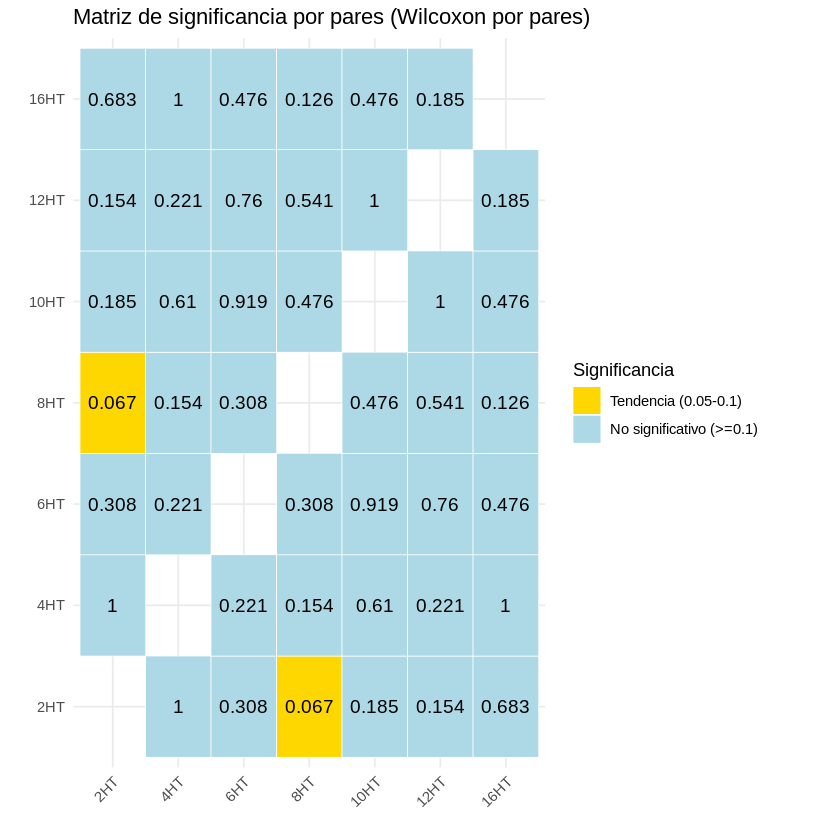

In [7]:
install.packages("reshape2")
library(reshape2)
library(ggplot2)

# Convertir la matriz en data frame largo, eliminando diagonales (NA)
df_long <- melt(matriz_final, na.rm = TRUE)
names(df_long) <- c("Grupo1", "Grupo2", "P_Valor")

# Crear una columna con categorías para colorear
df_long$Significancia <- cut(df_long$P_Valor,
  breaks = c(-Inf, 0.05, 0.1, Inf),
  labels = c("Significativo (<0.05)", "Tendencia (0.05-0.1)", "No significativo (>=0.1)")
)

# Generar el gráfico
ggplot(df_long, aes(x = Grupo1, y = Grupo2, fill = Significancia)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(P_Valor, 3)), size = 4) +
  scale_fill_manual(values = c(
    "Significativo (<0.05)" = "red",
    "Tendencia (0.05-0.1)" = "gold",
    "No significativo (>=0.1)" = "lightblue"
  )) +
  labs(title = "Matriz de significancia por pares (Wilcoxon por pares)",
       x = "", y = "", fill = "Significancia") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Comparación gráfica de las Ganancias obtenidas optimizando 2HT y 8HT con la Bayesiana, que son los pares que tienen p-valor más cercano a 0.05, con 0.0665 que es la única tendendia interesante aunque no alcance el umbral de significancia estádística.


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




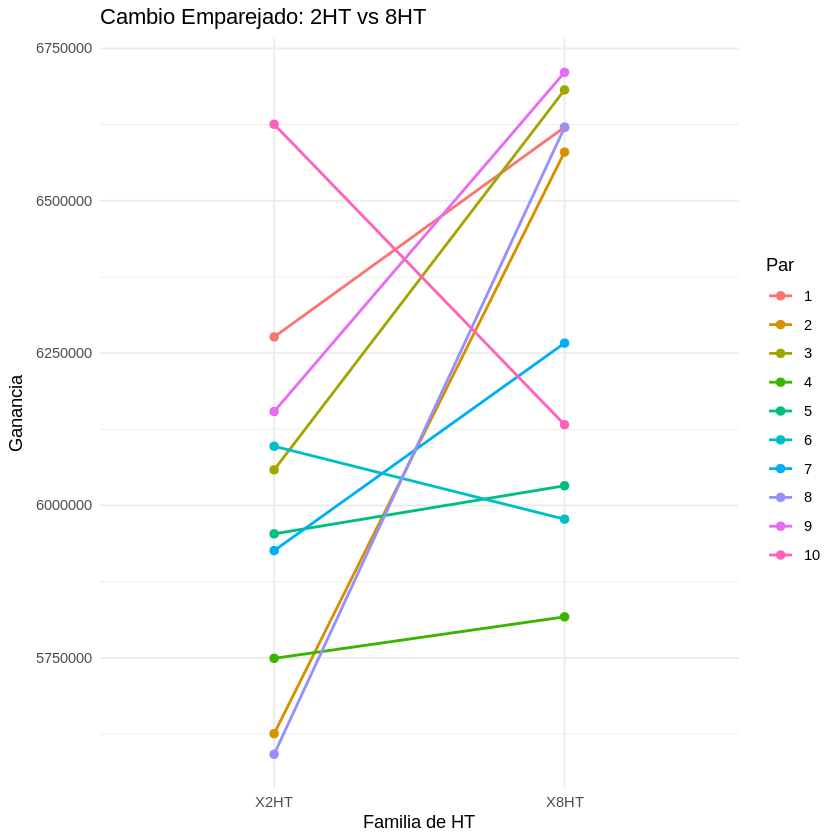

In [10]:
library(tidyr)
library(ggplot2)

# Comparar un par específico, por ejemplo 2HT vs 8HT (as per PARAM_8HT)
df_pareado <- data.frame(
  ID = 1:10,
  `2HT` = PARAM_2HT,
  `8HT` = PARAM_8HT # Renamed to 8HT to match the parameter and the plot title
)

# Convertir a formato largo para graficar
df_largo <- pivot_longer(df_pareado, cols = c("X2HT", "X8HT"), names_to = "Grupo", values_to = "Valor")

# Dotplot con líneas conectando los puntos emparejados
ggplot(df_largo, aes(x = Grupo, y = Valor, group = ID)) +
  geom_point(aes(color = as.factor(ID)), size = 2) +
  geom_line(aes(color = as.factor(ID)), linewidth = 0.8) +
  labs(title = "Cambio Emparejado: 2HT vs 8HT",
       x = "Familia de HT", y = "Ganancia",
       color = "Par") +
  theme_minimal()

Este gráfico muestra la mediana, rango intercuartílico y posibles outliers de cada Familia de Hiperparametros Optimizados.

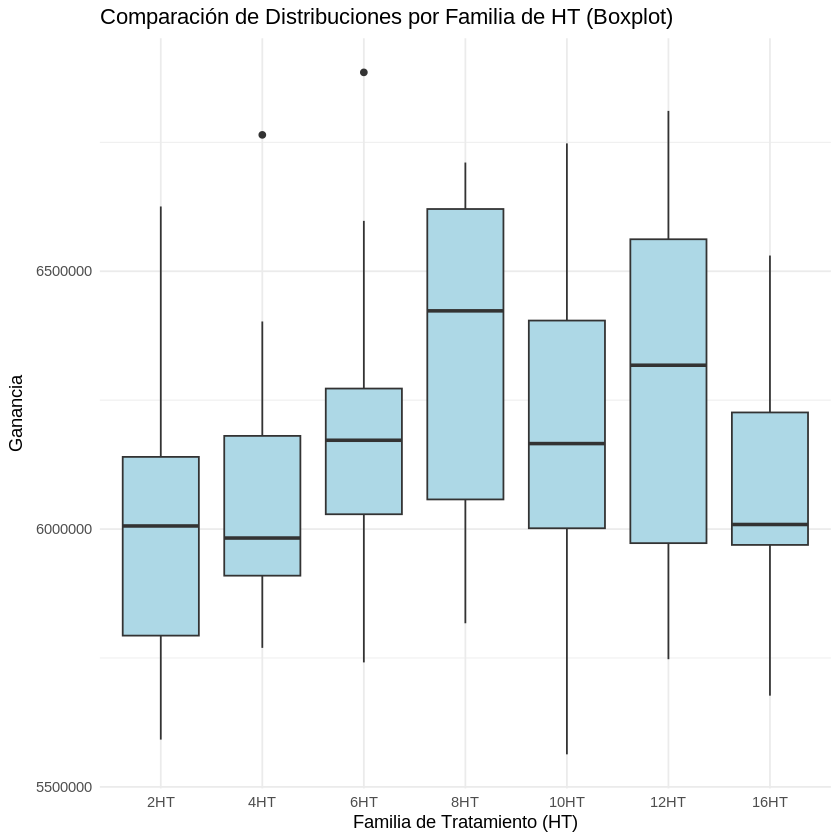

In [11]:
library(tidyr)
library(dplyr)

# Convertir la lista a un data frame largo (long format)
datos_largos <- todos_los_parametros %>%
  as.data.frame() %>%
  pivot_longer(cols = everything(), names_to = "Grupo", values_to = "Valor")

# Limpiar nombres de grupo (quitar "PARAM_")
datos_largos$Grupo <- gsub("PARAM_", "", datos_largos$Grupo)

# Ordenar por HT
datos_largos$Grupo <- factor(datos_largos$Grupo, levels = orden_grupos)

# Generar Boxplot
ggplot(datos_largos, aes(x = Grupo, y = Valor)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Comparación de Distribuciones por Familia de HT (Boxplot)",
       x = "Familia de Tratamiento (HT)",
       y = "Ganancia") +
  theme_minimal()
